# 機械学習　第８章　実習問題（回帰）

## 問題文に従って各問題ごとにセルを複数追加してプログラムを実装してください。

## ※ 準備作業
### ▶ 以下を実施してください。

In [ ]:
# ドライブのマウント
# ディレクトリの作成
# ディレクトリへの移動
# house_rent.csv のアップロード

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
mkdir data

In [ ]:
cd data

/content/data


## ※ matplotlib日本語化のためのライブラリのインストール
### ▶ 以下を実行してください。

In [ ]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 9.7 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=dfead36fb16b473972039de03bc9802a169ed4d2dbb27b6541757e93e9e1567f
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


## データ分析対象データ

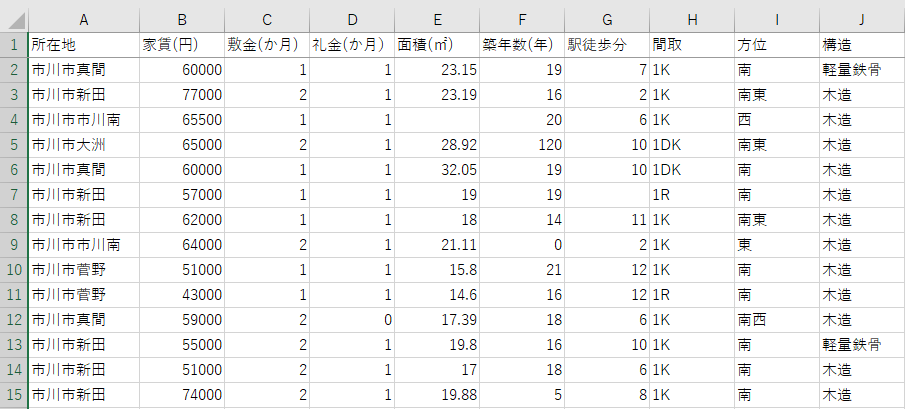

### ■ 正解データ　：　家賃（円）
### ■ 特徴量候補　：　所在地、敷金（か月）、礼金（か月）、面積（㎡）、築年数（年）、駅徒歩、間取、方位、構造

## 問題１　本データのデータ分析において使用する各種ライブラリをインポートしてください。
## また、グラフ表示が同一タブ上に表示されるようにしてください。

In [ ]:
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## 問題２　CSVファイル house_rent.csv を読み込んでください。ただし、エンコーディングは cp932 を使用してください。

In [ ]:
df = pd.read_csv('house_rent.csv', encoding='cp932')

## 問題３　読み込んだCSVファイルの先頭５行と末尾５行を表示してください。

In [ ]:
df.head(5)

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造
0,市川市真間,60000,1,1.0,23.15,19.0,7.0,1K,南,軽量鉄骨
1,市川市新田,77000,2,1.0,23.19,16.0,2.0,1K,南東,木造
2,市川市市川南,65500,1,1.0,NaN,20.0,6.0,1K,西,木造
3,市川市大洲,65000,2,1.0,28.92,120.0,10.0,1DK,南東,木造
4,市川市真間,60000,1,1.0,32.05,19.0,10.0,1DK,南,木造


In [ ]:
df.tail(5)

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造
299,市川市新田,64000,2,1.0,22.01,NaN,5.0,1R,南,木造
300,市川市新田,52000,1,0.0,18.02,25.0,13.0,1K,南東,軽量鉄骨
301,市川市新田,57000,1,1.0,21.70,20.0,10.0,1K,南,木造
302,市川市真間,60000,1,1.0,20.37,13.0,14.0,1K,西,鉄骨造
303,市川市新田,72000,2,1.0,20.70,0.0,2.0,1K,東,鉄骨造


## 問題４　質的データの列をすべて挙げてください。つぎに、それらの列にデータが何種類あるかを調べて表示してください。

In [ ]:
col =['所在地','間取','方位','構造']
df[col]

,所在地,間取,方位,構造
0,市川市真間,1K,南,軽量鉄骨
1,市川市新田,1K,南東,木造
2,市川市市川南,1K,西,木造
3,市川市大洲,1DK,南東,木造
4,市川市真間,1DK,南,木造
...,...,...,...,...
299,市川市新田,1R,南,木造
300,市川市新田,1K,南東,軽量鉄骨
301,市川市新田,1K,南,木造
302,市川市真間,1K,西,鉄骨造


In [ ]:
print('所在地 :',len(df['所在地'].unique()),'種類')
print('間取 :',len(df['間取'].unique()),'種類')
print('方位 :',len(df['方位'].unique()),'種類')
print('構造 :',len(df['構造'].unique()),'種類')

所在地 : 10 種類
間取 : 3 種類
方位 : 7 種類
構造 : 4 種類


## 問題５　質的データをすべてダミー化してデータ分析させるデータフレームを作成して下さい。次に、作成したデータフレームの先頭５行を表示してください。

In [ ]:
dummy = pd.get_dummies(df[col],drop_first=True)
df2 = pd.concat([df, dummy],axis = 1)
df2 = df2.drop(col, axis=1)
df2.head(5)

,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,所在地_市川市大洲,所在地_市川市大町,所在地_市川市市川,所在地_市川市市川南,所在地_市川市平田,所在地_市川市新田,所在地_市川市真間,所在地_市川市菅野,所在地_市川市須和田,間取_1K,間取_1R,方位_北東,方位_南,方位_南東,方位_南西,方位_東,方位_西,構造_軽量鉄骨,構造_鉄骨造
0,60000,1,1.0,23.15,19.0,7.0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,77000,2,1.0,23.19,16.0,2.0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
2,65500,1,1.0,NaN,20.0,6.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,65000,2,1.0,28.92,120.0,10.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60000,1,1.0,32.05,19.0,10.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


## 問題６　問題５で作成したデータフレームにおいて、訓練データ、検証データ、テストデータに分割してください。
### ただし、訓練データとテストデータの比率は８：２、乱数シードは０とします。

In [ ]:
train_val, test = train_test_split(df2, test_size=0.2, random_state=0)

## 問題７　訓練データにおいて、欠損値を確認して表示し、平均値で穴埋めしてください。欠損値処理した訓練データの先頭５行を表示してください。

In [ ]:
#欠損値の表示
train_val.isnull().sum()

家賃(円)         0
敷金(か月)        0
礼金(か月）        0
面積(㎡)         1
築年数(年)        1
駅徒歩分          1
所在地_市川市大洲     0
所在地_市川市大町     0
所在地_市川市市川     0
所在地_市川市市川南    0
所在地_市川市平田     0
所在地_市川市新田     0
所在地_市川市真間     0
所在地_市川市菅野     0
所在地_市川市須和田    0
間取_1K         0
間取_1R         0
方位_北東         0
方位_南          0
方位_南東         0
方位_南西         0
方位_東          0
方位_西          0
構造_軽量鉄骨       0
構造_鉄骨造        0
dtype: int64

In [ ]:
train_val_mean = train_val.mean()#平均値
train_val2 = train_val.fillna(train_val_mean)#平均値穴埋め
train_val2.head(5)

,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,所在地_市川市大洲,所在地_市川市大町,所在地_市川市市川,所在地_市川市市川南,所在地_市川市平田,所在地_市川市新田,所在地_市川市真間,所在地_市川市菅野,所在地_市川市須和田,間取_1K,間取_1R,方位_北東,方位_南,方位_南東,方位_南西,方位_東,方位_西,構造_軽量鉄骨,構造_鉄骨造
176,69000,2,1.0,19.87,1.0,2.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
26,70000,2,2.0,31.53,28.0,8.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
74,65000,2,1.0,28.92,12.0,10.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
101,51000,1,1.0,20.50,20.0,2.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
154,72000,2,1.0,20.70,0.0,2.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0


## 問題８　外れ値処理をしてください。
### ただし、処理過程を説明できるようにセルを構成してください。

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


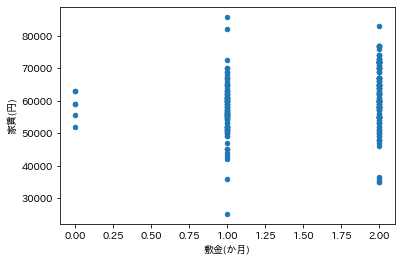

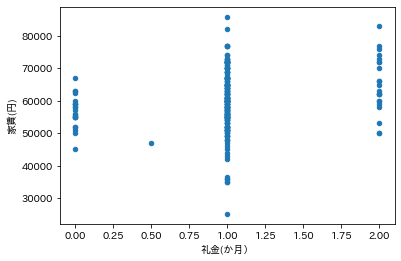

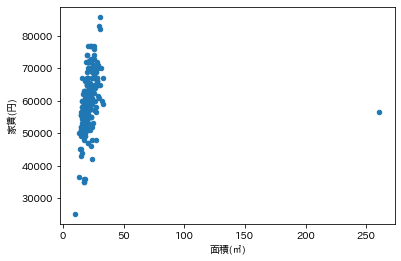

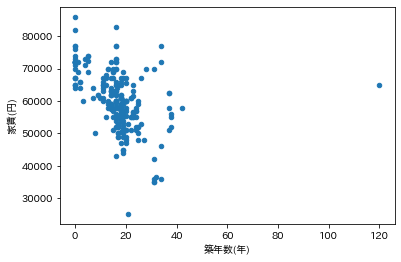

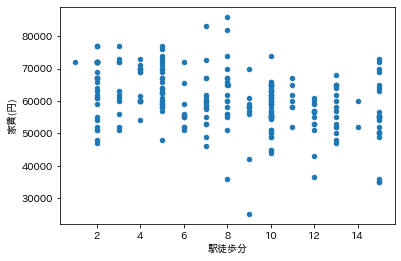

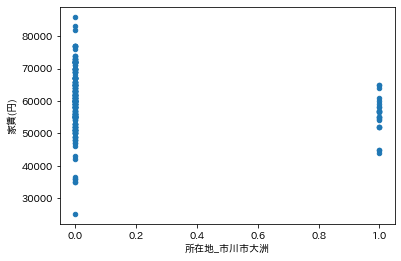

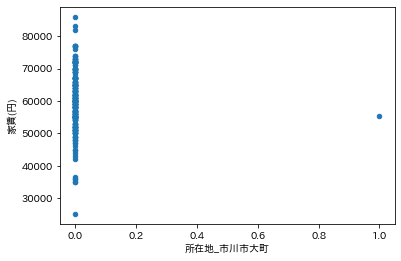

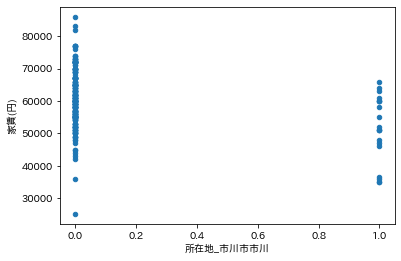

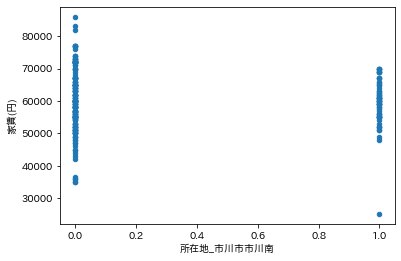

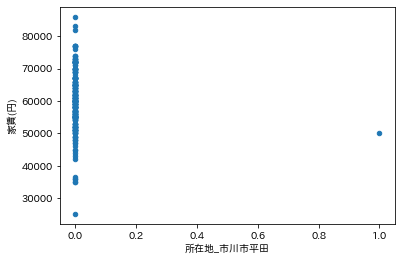

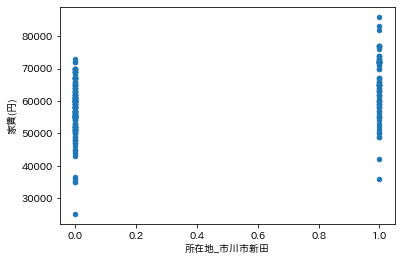

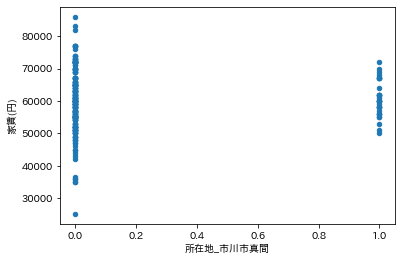

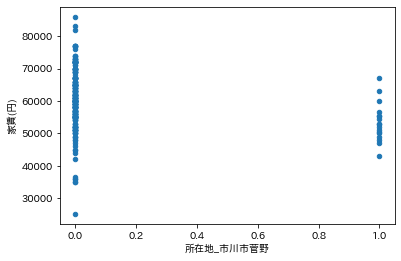

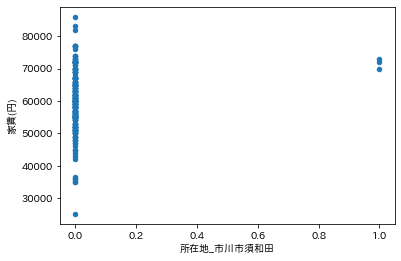

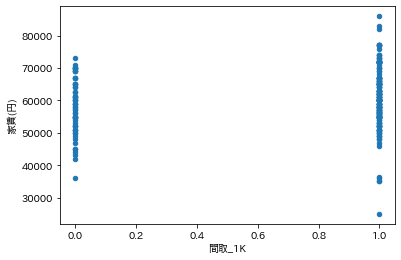

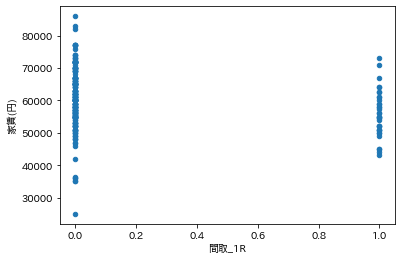

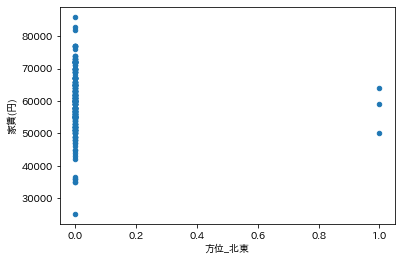

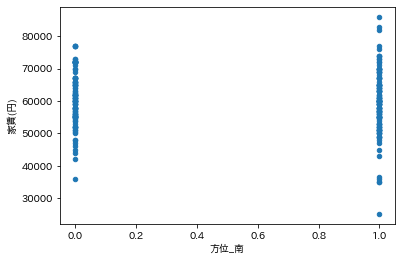

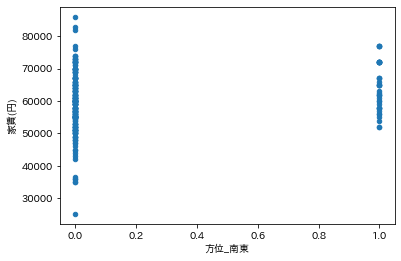

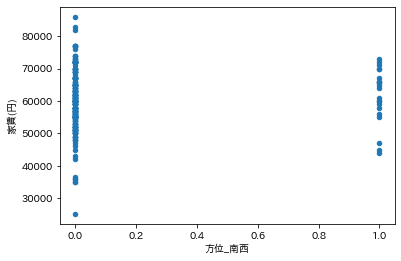

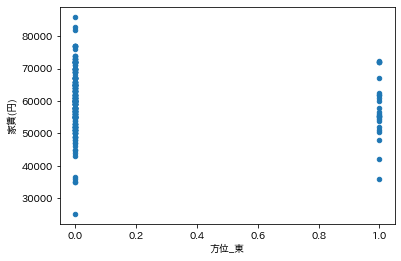

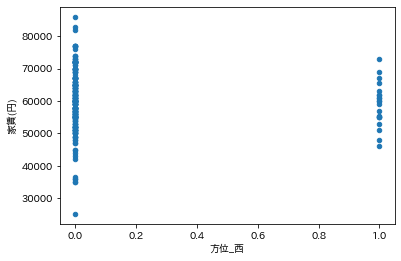

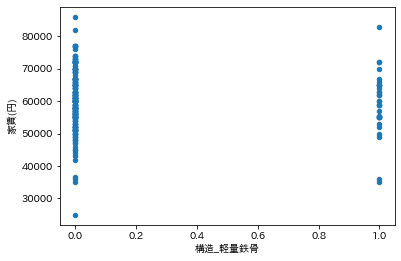

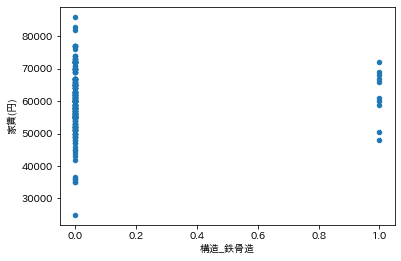

In [ ]:

#散布図表示
col_name = train_val2.columns

for name in col_name:
  if name != '家賃(円)':
    train_val2.plot(kind='scatter', x=name, y='家賃(円)')

In [ ]:
#外れ値 '面積(㎡)'
no1 = train_val2[(train_val2['家賃(円)'] > 50000) & ( train_val2['面積(㎡)'] > 250)].index

#外れ値 '築年数(年)'
no2 = train_val2[(train_val2['家賃(円)'] > 50000) & ( train_val2['築年数(年)'] > 110)].index


#外れ値 '所在地_市川市大町'
no3 = train_val2[(train_val2['家賃(円)'] > 50000) & ( train_val2['所在地_市川市大町'] >0.8)].index

#外れ値 '築年数(年)'
no4 = train_val2[(train_val2['家賃(円)'] > 40000) & ( train_val2['所在地_市川市平田'] >0.8)].index
print(no1,no2,no3,no4)

#外れ値除外
train_val3 = train_val2.drop(no1, axis=0)
train_val3 = train_val3.drop(no2, axis=0)
train_val3 = train_val3.drop(no3, axis=0)
train_val3 = train_val3.drop(no4, axis=0)

Int64Index([95], dtype='int64') Int64Index([3], dtype='int64') Int64Index([57], dtype='int64') Int64Index([192], dtype='int64')


## 問題９　外れ値処理の結果を表示してください。

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


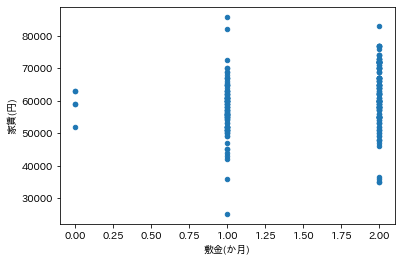

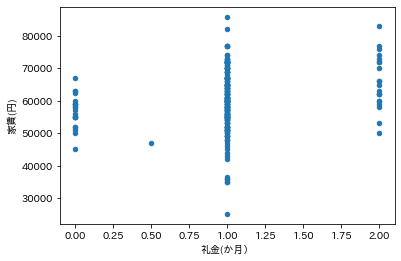

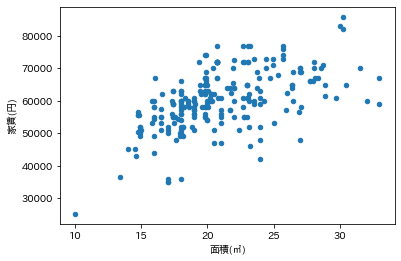

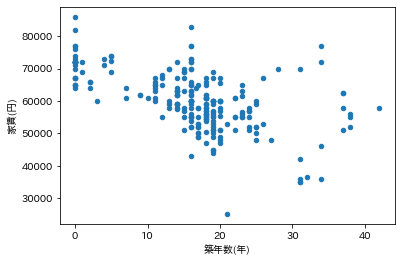

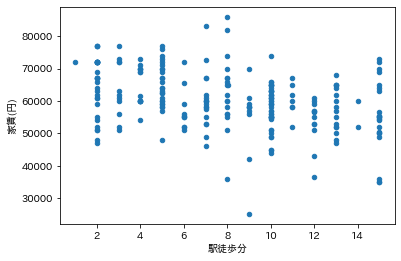

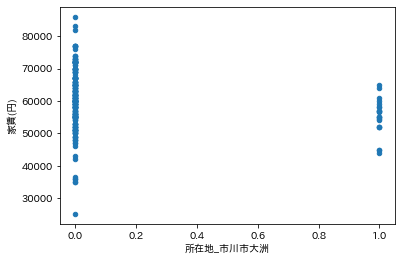

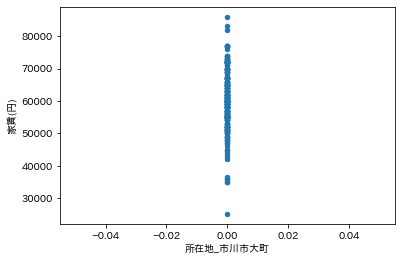

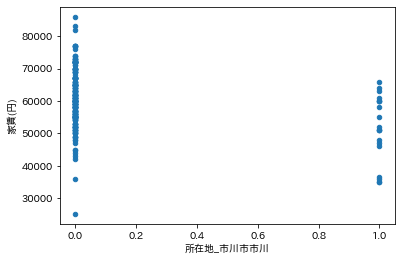

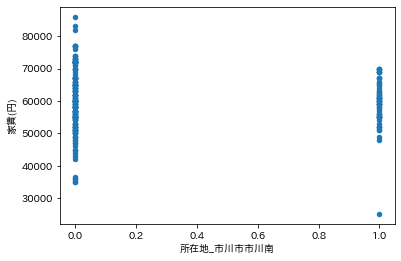

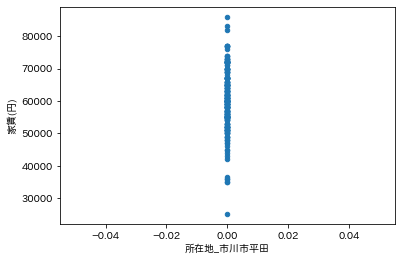

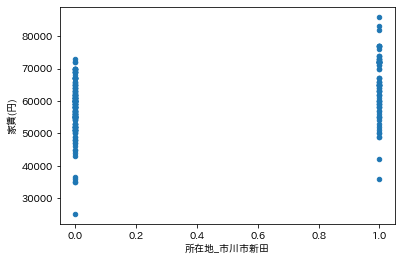

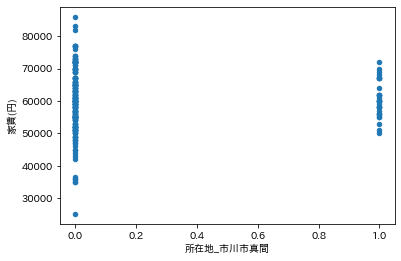

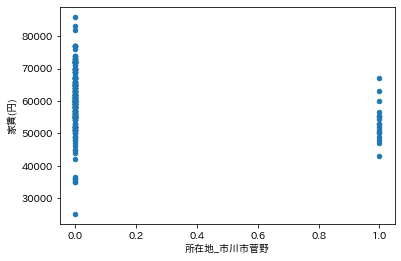

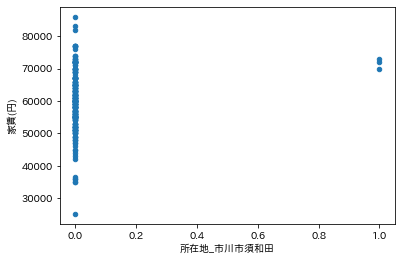

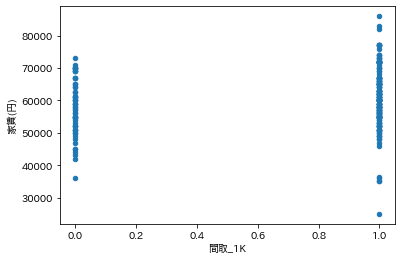

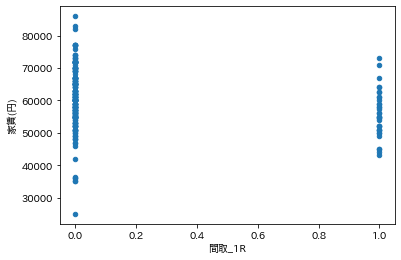

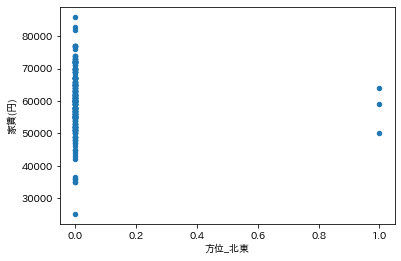

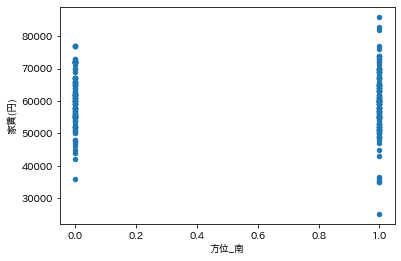

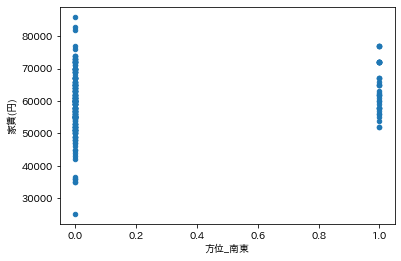

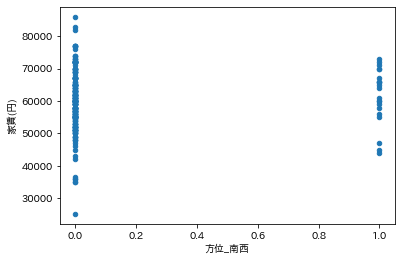

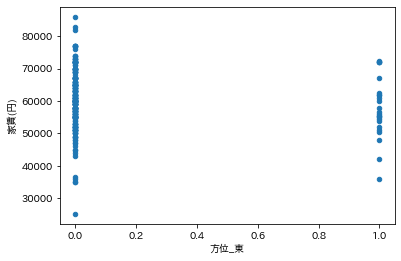

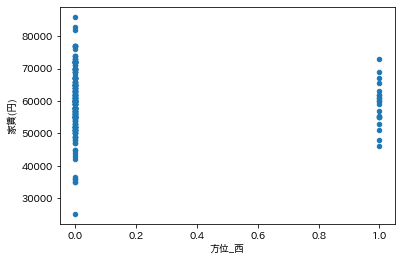

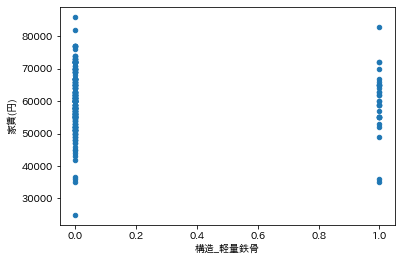

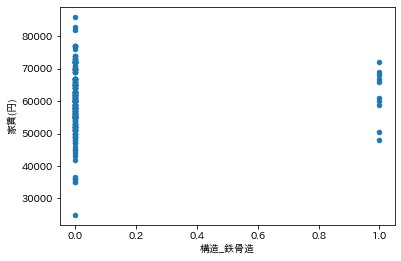

In [ ]:
#散布図表示
col_name = train_val3.columns

for name in col_name:
  if name != '家賃(円)':
    train_val3.plot(kind='scatter', x=name, y='家賃(円)')

## 問題１０　正解データと各特徴量の相関関係を説明できるように表示してください。

In [ ]:
#家賃(円)列との相関係数
train_cor = train_val3.corr()['家賃(円)']
train_cor

家賃(円)         1.000000
敷金(か月)        0.222001
礼金(か月）        0.219265
面積(㎡)         0.550981
築年数(年)       -0.562408
駅徒歩分         -0.364332
所在地_市川市大洲    -0.176352
所在地_市川市大町          NaN
所在地_市川市市川    -0.284923
所在地_市川市市川南   -0.042139
所在地_市川市平田          NaN
所在地_市川市新田     0.377476
所在地_市川市真間     0.015709
所在地_市川市菅野    -0.209631
所在地_市川市須和田    0.143106
間取_1K         0.147231
間取_1R        -0.198545
方位_北東        -0.032430
方位_南         -0.073146
方位_南東         0.203518
方位_南西         0.048789
方位_東         -0.090683
方位_西         -0.044896
構造_軽量鉄骨      -0.013638
構造_鉄骨造        0.041757
Name: 家賃(円), dtype: float64

## 問題１１　正解データと特徴量を抽出し、それぞれの先頭５行を表示してください。

In [ ]:
#特徴量 相関係数が0.3以上
col = ['家賃(円)','面積(㎡)','築年数(年)','駅徒歩分']
x = train_val3[col]
x.head(5)

,家賃(円),面積(㎡),築年数(年),駅徒歩分
176,69000,19.87,1.0,2.0
26,70000,31.53,28.0,8.0
74,65000,28.92,12.0,10.0
101,51000,20.50,20.0,2.0
154,72000,20.70,0.0,2.0


## 問題１２　問題１１で抽出した正解データと特徴量を使用して、訓練データと検証データに分割してください。
### ただし、訓練データと検証データの比率は８：２、乱数シードは０とします。

In [ ]:
#特徴量
col3 = ['面積(㎡)','築年数(年)','駅徒歩分'] 
x = train_val3[col3] 
#正解データ
t = train_val3[['家賃(円)']] 
#訓練データと検証データに分割
x_train, x_val, y_train, y_val = train_test_split(x, t, test_size = 0.2, random_state = 0)

## 問題１３　線形重回帰モデルを使用して学習さて、検証データで決定係数を求めて表示してください。

In [ ]:
#重回帰モデルの作成
model = LinearRegression()
#モデルに学習させる
model.fit(x_train, y_train)
#決定係数
model.score(x_val, y_val)

0.5909758120708426

## 問題１４　問題１３で学習したモデルを使用して以下のデータを使用して家賃がいくらになるか予測させてください。
### 予測させるデータは以下の通りです。
#### 敷金：１か月
#### 礼金；１か月
#### 面積：３０㎡
#### 築年数：３年
#### 駅徒歩分：１０分
#### 所在地：市川市新田
#### 間取：１DK
#### 方位：南向き
#### 構造：鉄骨造


In [ ]:
new = [[1,19.87,22]]

#家賃の予測
model.predict(new)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[60993.40489531]])

## 問題１５　特徴量エンジニアリングで訓練データと検証データの決定係数が特徴量エンジニアリングを行う前より良くなるようにしてください。
### ただし、特徴量エンジニアリングの過程が理解できるようにセルを構成してください。

## 問題１６　チューニング結果を受けて、データの標準化後再学習をしてください。

## 問題１７　テストデータを使用してモデルを評価してください。
## ただし、決定係数の値が 0.65 以上となるようにしてください。

## 問題１８　モデルとStandardScalerオブジェクトを保存してください。
### ただし、モデルは house_rent.pkl、StandardScalerオブジェクトは house_rent_scx と house_rent_scy とします。

In [ ]:
import pickle

with open('house_rent.pkl', 'wb') as f:
  pickle.dump(model2, f)

with open('house_rent_scx', 'wb') as f:
  pickle.dump('sc_model_x', f)

with open('house_rent_scy', 'wb') as f:
  pickle.dump('sc_model_t', f)

NameError: ignored